In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [11]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('SKX.csv')

In [12]:
# Chuyển cột 'Date' sang dạng datetime và đặt cột 'Date' làm index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [13]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80:20)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [14]:
# Chọn cột 'Close' làm mục tiêu dự đoán
target_col = 'Close'

In [15]:
# Tạo mô hình SVR
svr = SVR(kernel='rbf')  # Có thể thay đổi kernel tùy vào yêu cầu

In [16]:
# Huấn luyện mô hình trên tập huấn luyện
svr.fit(train.index.values.reshape(-1, 1), train[target_col])

SVR()

In [17]:
# Dự đoán trên tập kiểm tra và 30 ngày tiếp theo
test_predict = svr.predict(test.index.values.reshape(-1, 1))
next_30_days = svr.predict(pd.date_range(test.index[-1], periods=30).values.reshape(-1, 1))

In [18]:
# Xác định chỉ mục của test sau khi đã loại bỏ dữ liệu thiếu
test_index = test.index

# Loại bỏ dữ liệu thiếu trong test và test_predict
test.dropna(inplace=True)
test_predict = test_predict[:len(test)]

# Tiếp tục tính toán các độ đo đánh giá
mae = mean_absolute_error(test[target_col], test_predict)
mse = mean_squared_error(test[target_col], test_predict)
rmse = np.sqrt(mse)

# In ra kết quả
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 12.641132541500319
Mean Squared Error (MSE): 201.50733291729497
Root Mean Squared Error (RMSE): 14.195327855223878


C:\Users\Chicken's Tien\AppData\Local\Temp\ipykernel_15008\3925096381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


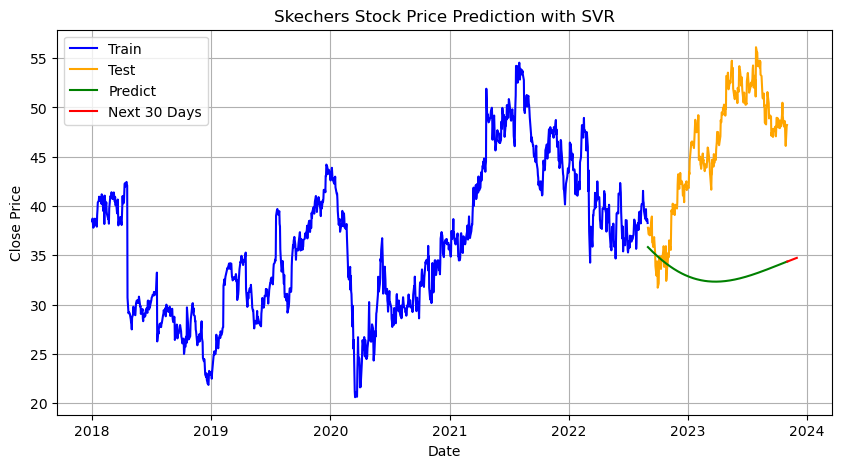

In [19]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 5))

plt.plot(train.index, train[target_col], label='Train', color='blue')
plt.plot(test.index, test[target_col], label='Test', color='orange')
plt.plot(test.index, test_predict, label='Predict', color='green')
plt.plot(pd.date_range(test.index[-1], periods=31)[1:], next_30_days, label='Next 30 Days', color='red')

plt.title('Skechers Stock Price Prediction with SVR')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()